In [1]:
library(Seurat)
library(SCEVAN)
library(dplyr)

# Set Working Directory
setwd("../")

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# PRO Subset

In [2]:
data.pro <- readRDS("GBMProject/GBMOrganoid/Checkpoints/TXP_PRO.rds")

In [3]:
# Module Scores
mac.genes = c("CD14","AIF1", "FCER1G","FCGR3A","TYROBP","CSF1R") 
t.genes = c("CD2", "CD3D", "CD3E", "CD3G") 
olig.genes = c("MBP", "TF", "PLP1", "MAG", "MOG", "CLDN11")

data.pro <- AddModuleScore(data.pro, features = list(mac.genes), name = "MacrophageScore", search = TRUE)
data.pro <- AddModuleScore(data.pro, features = list(olig.genes), name = "OligScore", search = TRUE)

Warning message:
“The following features are not present in the object: FCGR3A, TYROBP, attempting to find updated synonyms”
Warning message:
“No updated symbols found”
Warning message:
“The following features are still not present in the object: FCGR3A, TYROBP”


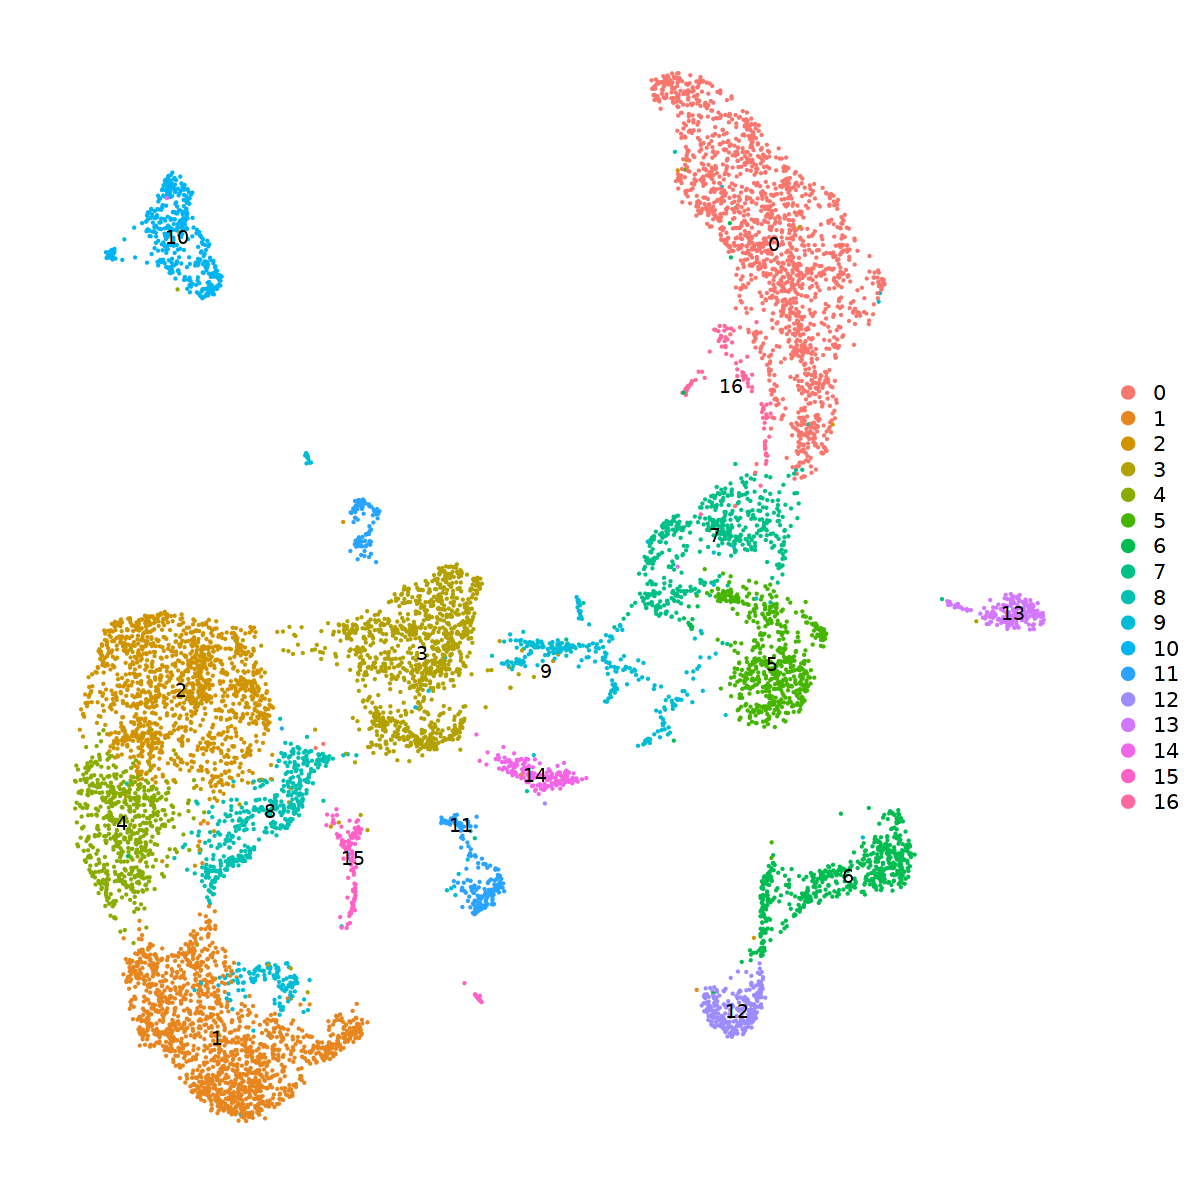

In [4]:
options(repr.plot.width=10, repr.plot.height=10) # To set the figure size in Jupyter
DimPlot(data.pro, reduction = "umap", label=TRUE) + NoAxes()

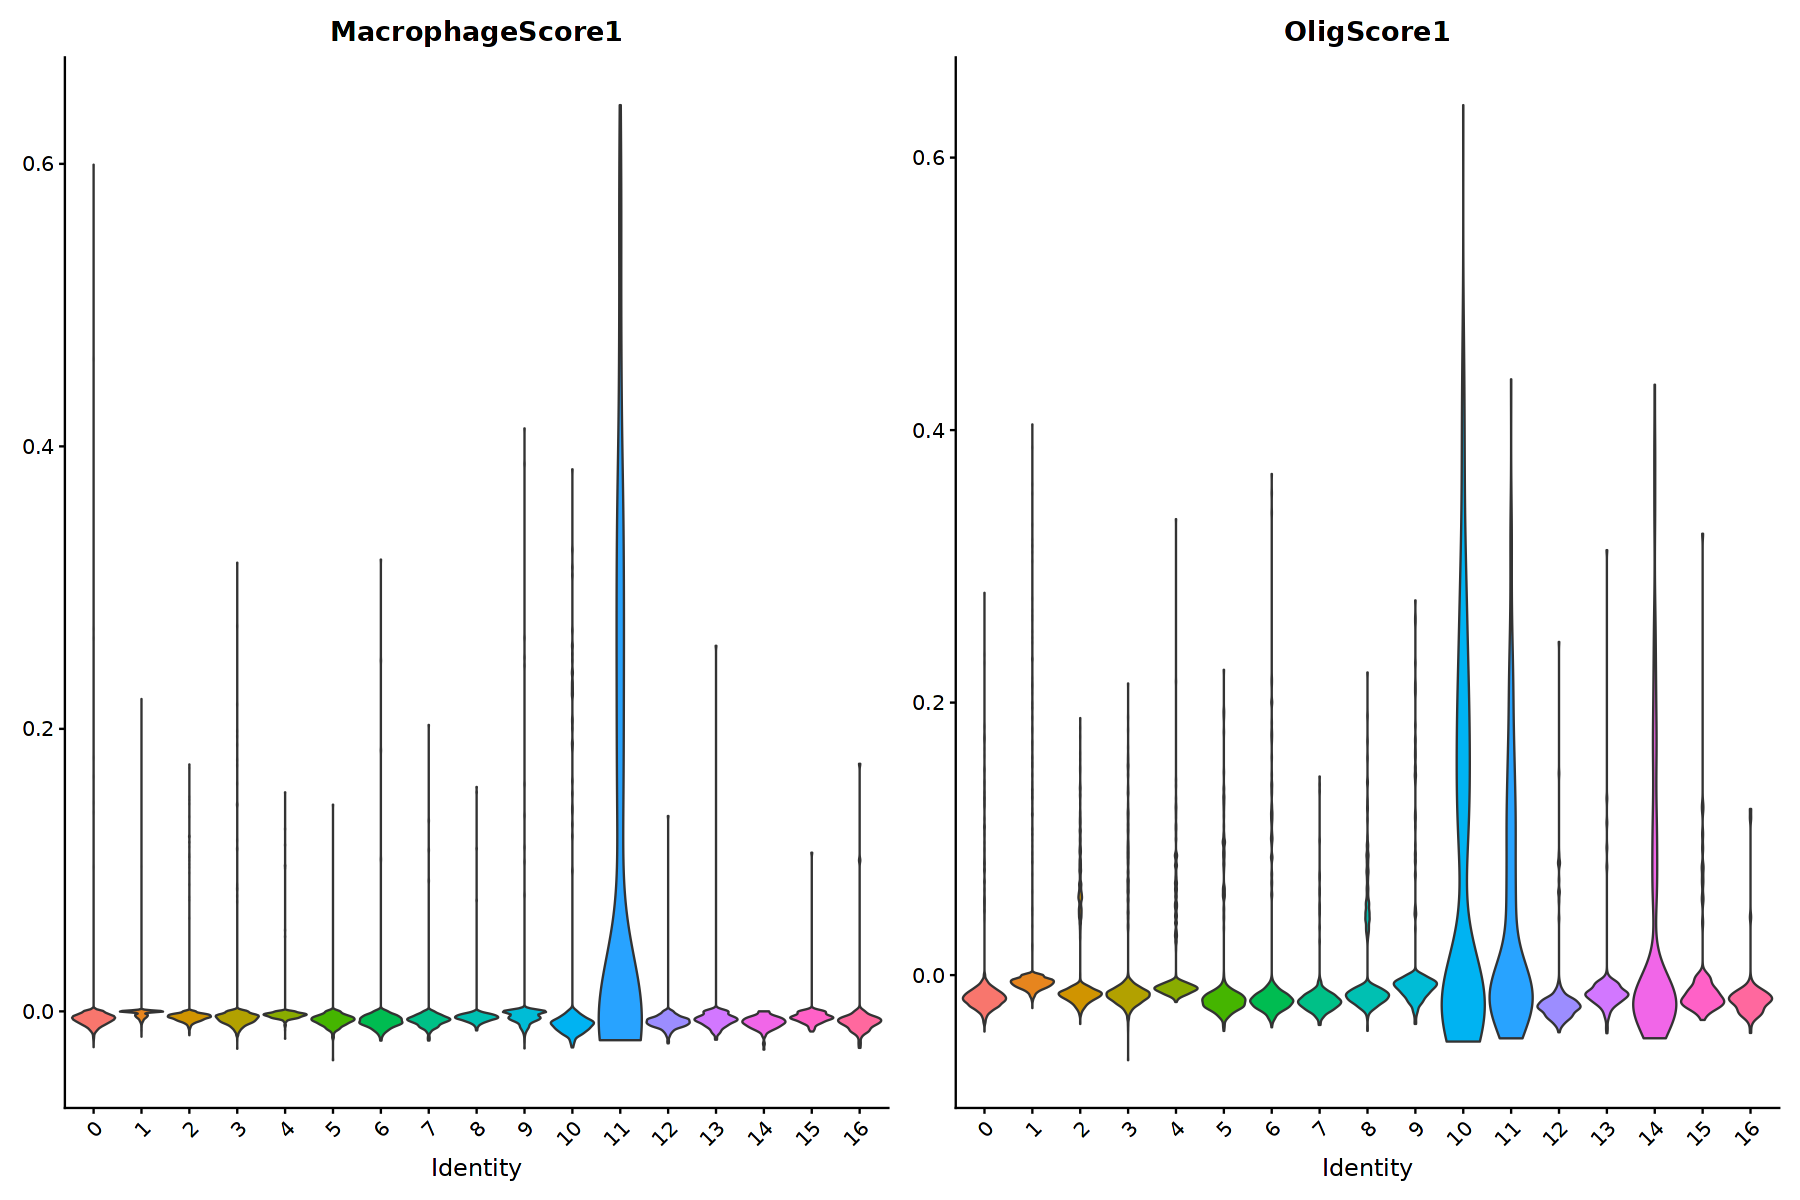

In [5]:
Idents(data.pro) <- "seurat_clusters"

vln1 <- VlnPlot(data.pro, features = 'MacrophageScore1', pt.size = 0) + NoLegend()
vln3 <- VlnPlot(data.pro, features = 'OligScore1', pt.size = 0) + NoLegend()

options(repr.plot.width=15, repr.plot.height=10)
vln1 | vln3

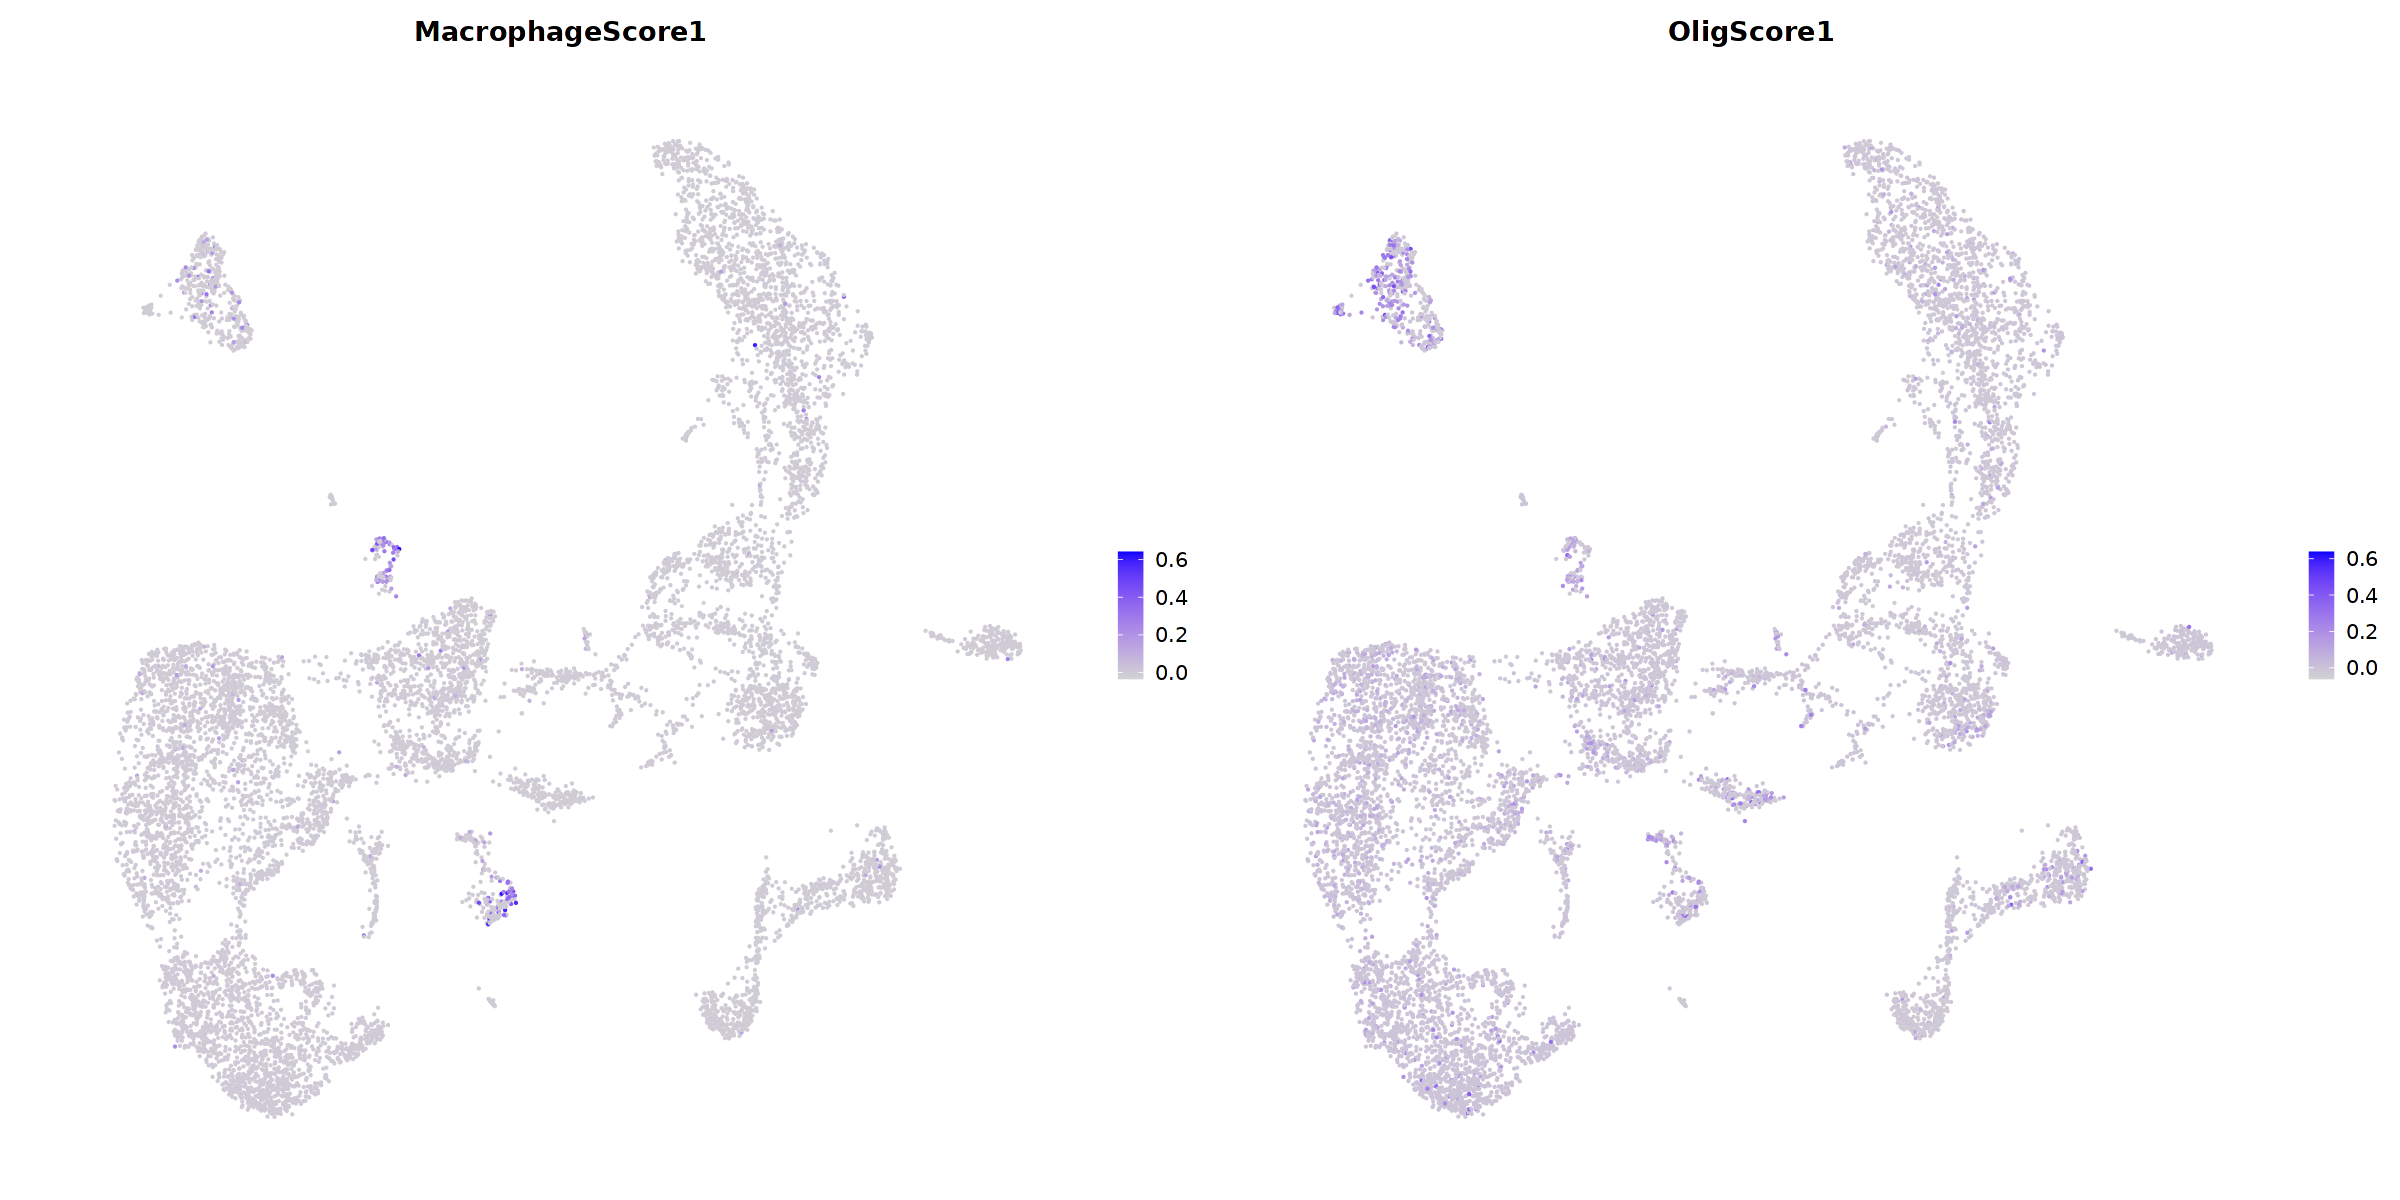

In [6]:
umap.mac <- FeaturePlot(data.pro, reduction = "umap", features = 'MacrophageScore1') + NoAxes()
umap.olig <- FeaturePlot(data.pro, reduction = "umap", features = 'OligScore1') + NoAxes() 

options(repr.plot.width=20, repr.plot.height=10) 
umap.mac | umap.olig

In [7]:
counts <- data.pro[["RNA"]]$counts
nm <- WhichCells(object = data.pro, ident = 11)

In [8]:
setwd("../SCEVAN/PRO")
results.pro <- SCEVAN::pipelineCNA(counts, sample = 'PRO_TXP', par_cores = 5, norm_cell=nm, SUBCLONES = TRUE, plotTree = TRUE)

[1] " raw data - genes: 28499 cells: 10103"
[1] "1) Filter: cells > 200 genes"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.1 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.1 GiB”


[1] "2) Filter: genes > 10% of cells"
[1] "9593 genes past filtering"
[1] "3) Annotations gene coordinates"
[1] "8731 genes annotated"
[1] "4) Filter: genes involved in the cell cycle"
[1] "8295 genes past filtering "
[1] "5)  Filter: cells > 5genes per chromosome "
[1] "6) Log Freeman Turkey transformation"
[1] "A total of 9951 cells, 8295 genes after preprocessing"
[1] "7) Measuring baselines (confident normal cells)"
[1] "8) Smoothing data"
[1] "9) Segmentation (VegaMC)"
[1] "10) Adjust baseline"
[1] "11) plot heatmap"
[1] "found 1922 tumor cells"
[1] "time classify tumor cells:  19.9857787172"


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQR

[1] "found 5 subclones"
percentage_cells_subsclone_1 percentage_cells_subsclone_2 
                  0.17325702                   0.22216441 
percentage_cells_subsclone_3 percentage_cells_subsclone_4 
                  0.26899063                   0.25234131 
percentage_cells_subsclone_5 
                  0.08324662 
[1] "Segmentation of subclone :  1"
[1] "Segmentation of subclone :  2"
[1] "Segmentation of subclone :  3"
[1] "Segmentation of subclone :  4"
[1] "Segmentation of subclone :  5"


Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been dis

$PRO_TXP_subclone1
   Chr    Start      End Alteration segm.mean
44   8 72537391 86514357          1  0.147067

$PRO_TXP_subclone2
    Chr     Start       End Alteration segm.mean
31    4 158709134 174523154          2  0.164857
35    5  83940554  95284575          2  0.280871
54    8  57978358  66667217          2  0.201554
86   14  26443093  35809304          2  0.180227
1     1    923928  43978295         -1 -0.125266
15    2 132671799 157314211          1  0.151222
29    4 125316399 141212877          1  0.124848
121  18  52340172  63422483          1  0.165255

$PRO_TXP_subclone3
   Chr     Start       End Alteration segm.mean
38   4 155342658 173323967          2  0.199966
61   8  53966552  90052092          2  0.136455
4    1  36095236  67054099         -1 -0.127741
15   1 211326615 222668012         -1 -0.179179
18   2    217730  26244726          1  0.128298
30   3 139355600 160399880         -1 -0.117119
47   5 141094578 150155872          1  0.141965
82  11  72754729  873237

Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffS

  |======================================================================| 100%



Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.04% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


  |======================================================================| 100%



Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.02% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


  |======================================================================| 100%



Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.06% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


  |======================================================================| 100%



Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.06% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


  |======================================================================| 100%

[1] "time subclones:  23.128262869517"


In [9]:
saveRDS(results.pro, file = "GBMProject/GBMOrganoid/Checkpoints/SCEVAN_PRO.rds")
rm(results.pro,counts,data.pro,nm)

# MES Subset

In [10]:
data.mes <- readRDS("GBMProject/GBMOrganoid/Checkpoints/TXP_MES.rds")

In [11]:
# Module Scores
mac.genes = c("CD14","AIF1", "FCER1G","FCGR3A","TYROBP","CSF1R") 
t.genes = c("CD2", "CD3D", "CD3E", "CD3G") 
olig.genes = c("MBP", "TF", "PLP1", "MAG", "MOG", "CLDN11")

data.mes <- AddModuleScore(data.mes, features = list(mac.genes), name = "MacrophageScore", search = TRUE)
data.mes <- AddModuleScore(data.mes, features = list(t.genes), name = "TCellScore", search = TRUE)
data.mes <- AddModuleScore(data.mes, features = list(olig.genes), name = "OligScore", search = TRUE)

Warning message:
“The following features are not present in the object: FCGR3A, attempting to find updated synonyms”
Warning message:
“No updated symbols found”
Warning message:
“The following features are still not present in the object: FCGR3A”


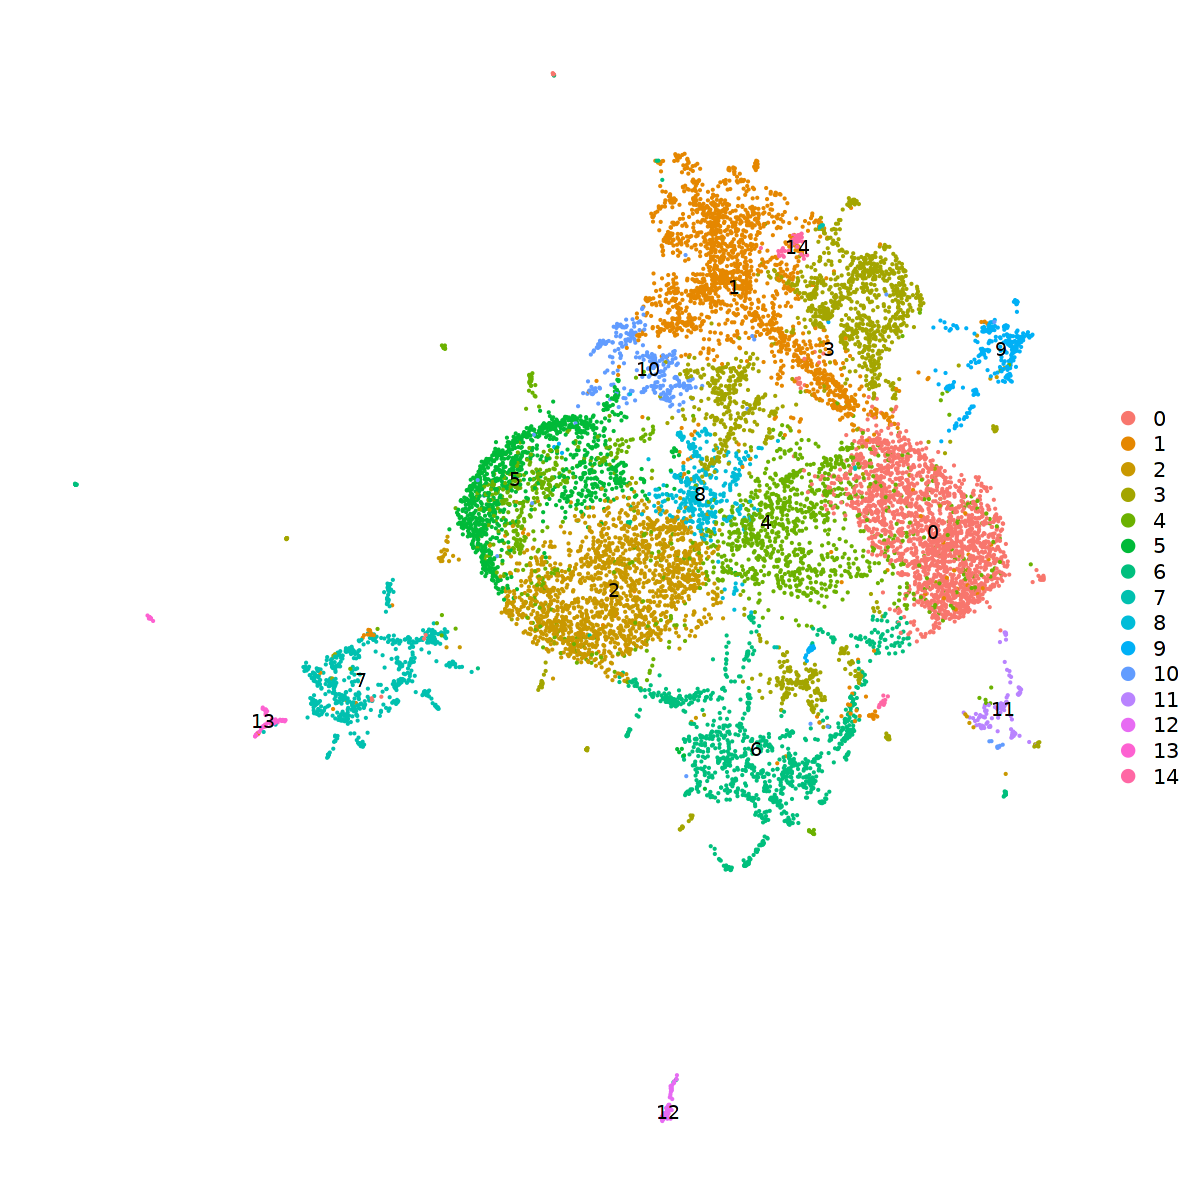

In [12]:
options(repr.plot.width=10, repr.plot.height=10) # To set the figure size in Jupyter
DimPlot(data.mes, reduction = "umap", label=TRUE) + NoAxes()

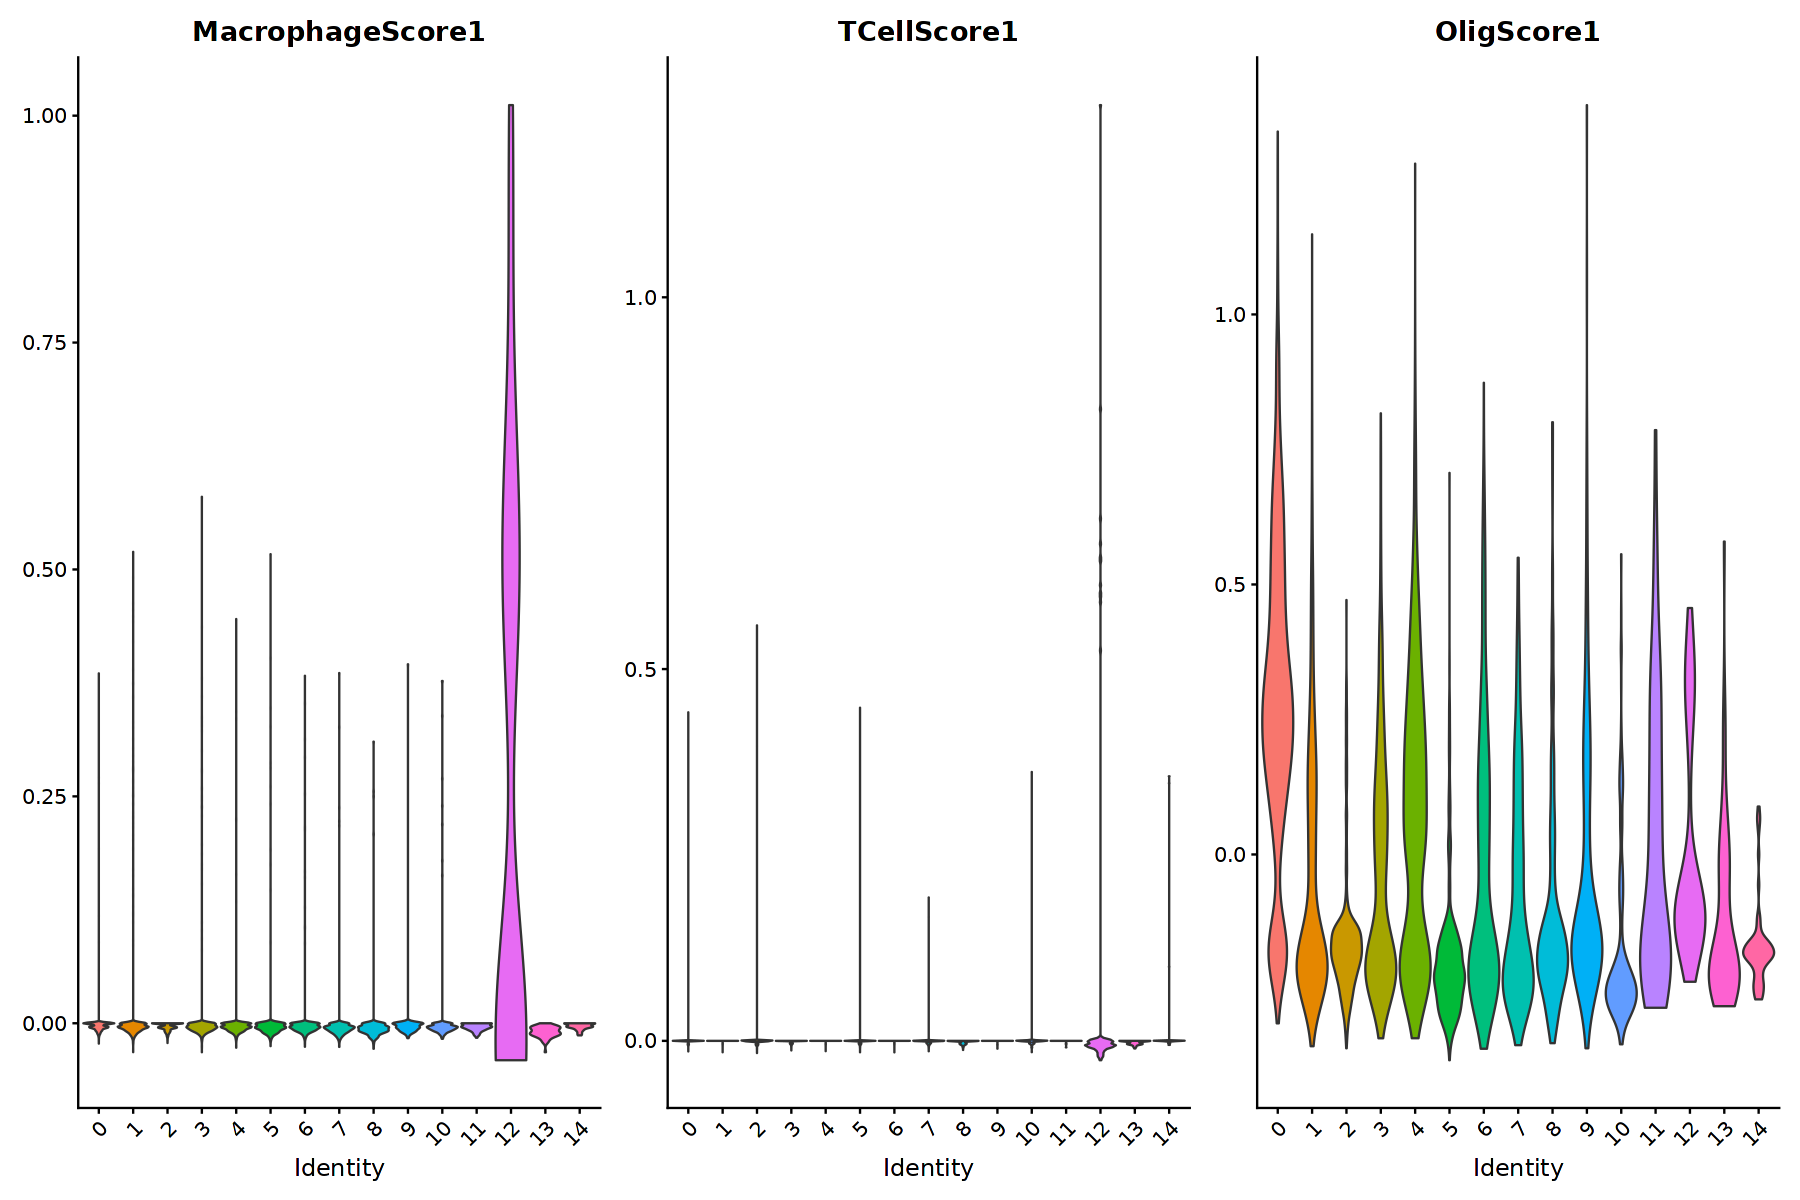

In [13]:
Idents(data.mes) <- "seurat_clusters"

vln1 <- VlnPlot(data.mes, features = 'MacrophageScore1', pt.size = 0) + NoLegend()
vln2 <- VlnPlot(data.mes, features = 'TCellScore1', pt.size = 0) + NoLegend()
vln3 <- VlnPlot(data.mes, features = 'OligScore1', pt.size = 0) + NoLegend()

options(repr.plot.width=15, repr.plot.height=10)
vln1 | vln2 | vln3

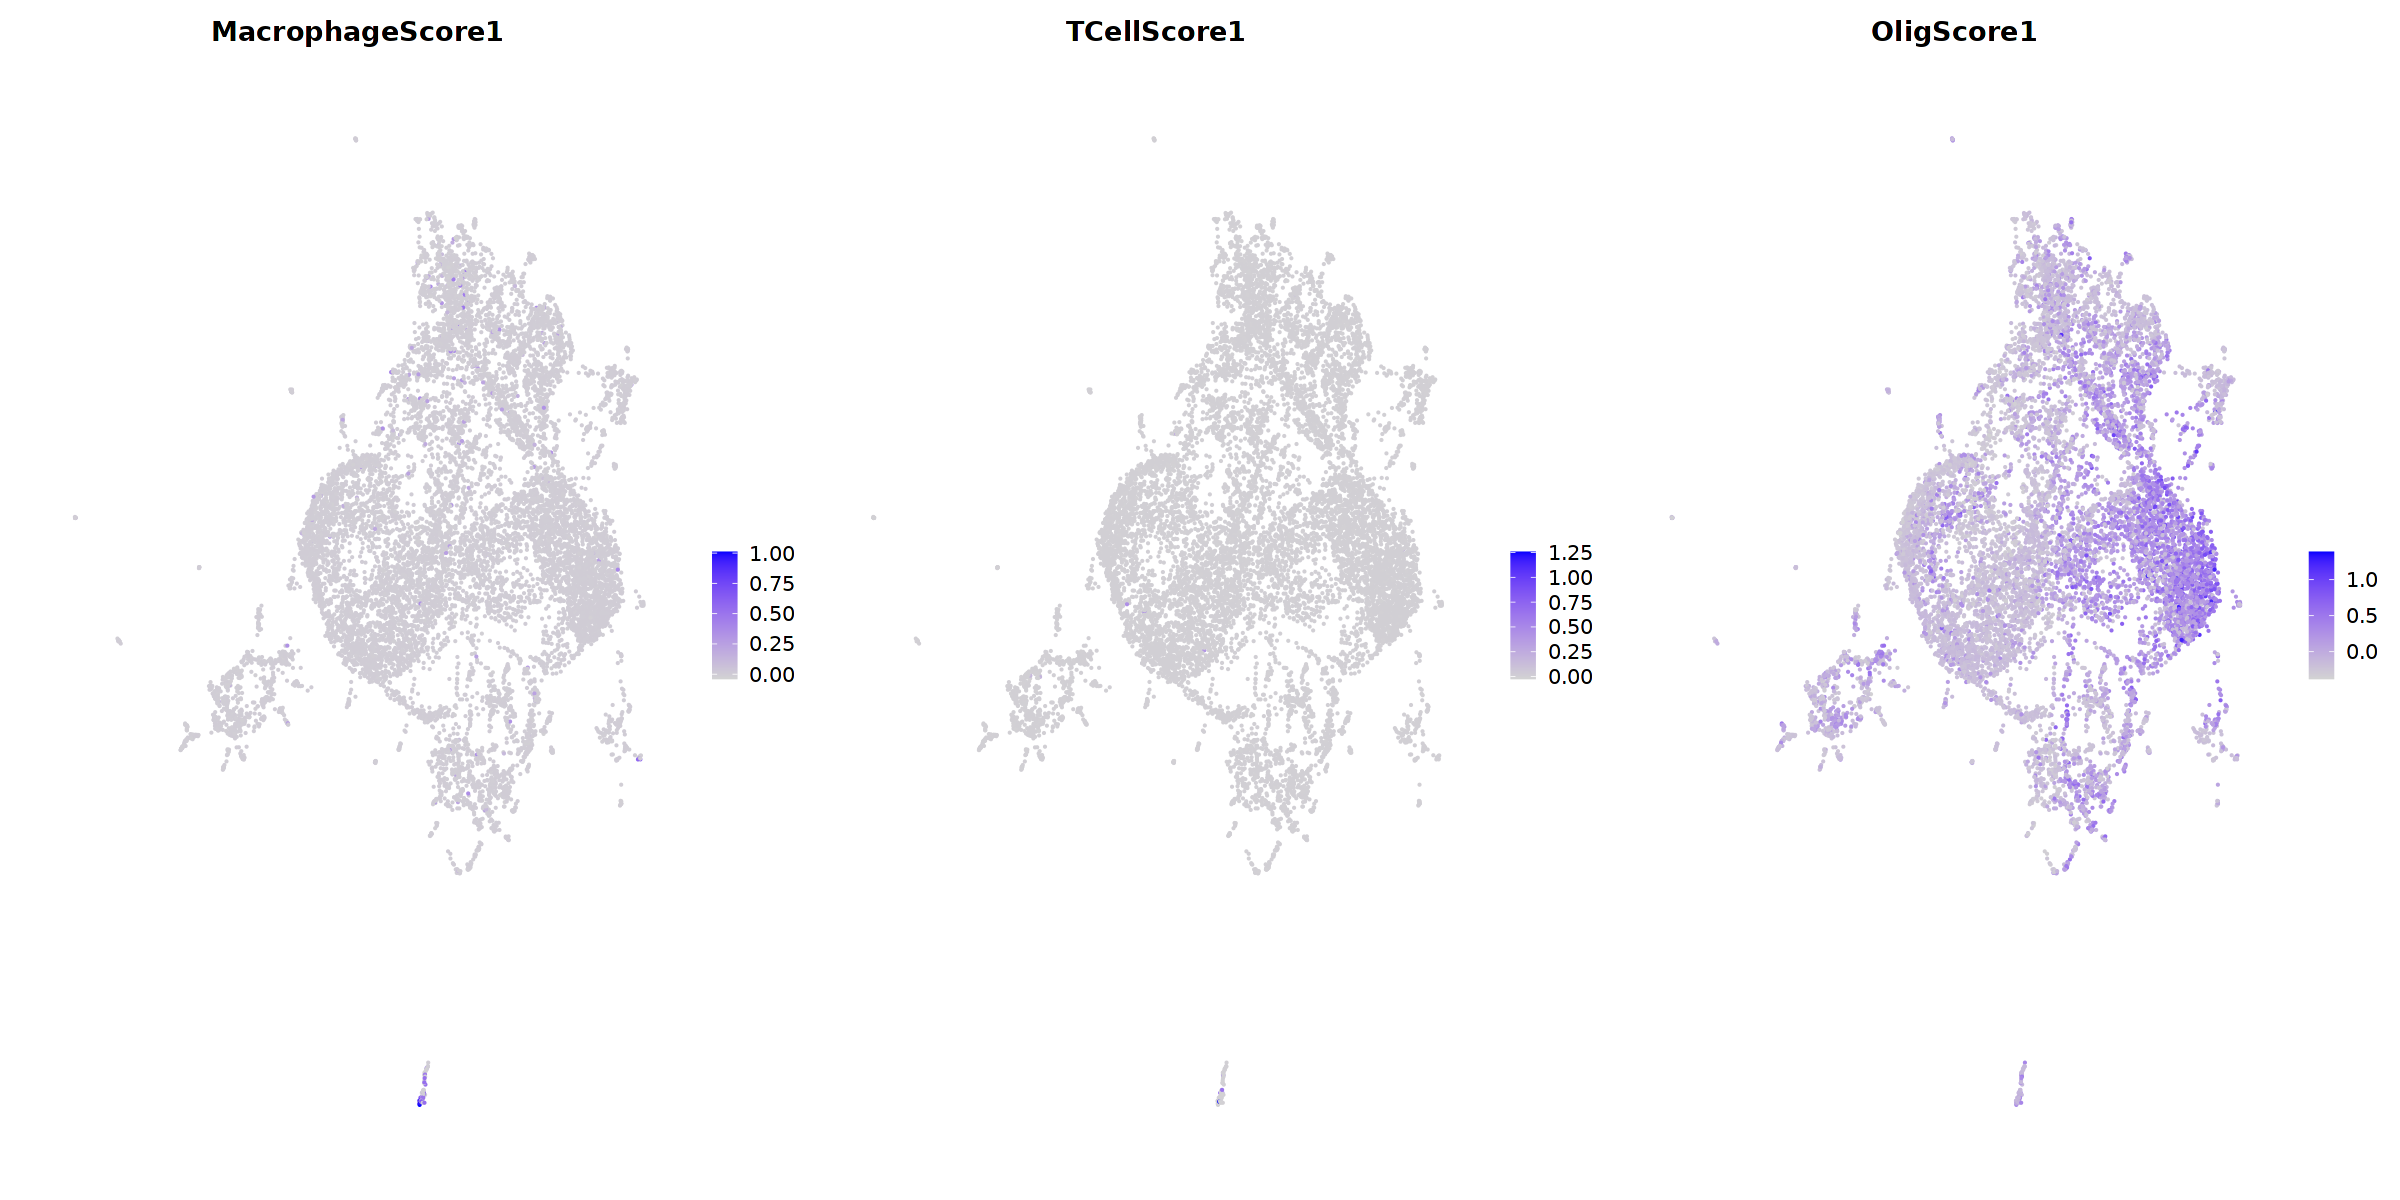

In [14]:
umap.mac <- FeaturePlot(data.mes, reduction = "umap", features = 'MacrophageScore1') + NoAxes()
umap.t <- FeaturePlot(data.mes, reduction = "umap", features = 'TCellScore1') + NoAxes() 
umap.olig <- FeaturePlot(data.mes, reduction = "umap", features = 'OligScore1') + NoAxes() 

options(repr.plot.width=20, repr.plot.height=10) 
umap.mac | umap.t | umap.olig

In [15]:
counts <- data.mes[["RNA"]]$counts
nm <- WhichCells(object = data.mes, ident = 12)

In [16]:
setwd("../SCEVAN/MES")

results.mes <- SCEVAN::pipelineCNA(counts, sample = 'MES_TXP', par_cores = 5, norm_cell=nm, SUBCLONES = TRUE, plotTree = TRUE)

[1] " raw data - genes: 25595 cells: 12452"
[1] "1) Filter: cells > 200 genes"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.4 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.4 GiB”


[1] "low data quality"
[1] "2) Filter: genes > 5% of cells"
[1] "8341 genes past filtering"
[1] "3) Annotations gene coordinates"
[1] "7689 genes annotated"
[1] "4) Filter: genes involved in the cell cycle"
[1] "7279 genes past filtering "
[1] "5)  Filter: cells > 5genes per chromosome "
[1] "6) Log Freeman Turkey transformation"
[1] "A total of 11418 cells, 7279 genes after preprocessing"
[1] "7) Measuring baselines (confident normal cells)"
[1] "8) Smoothing data"
[1] "9) Segmentation (VegaMC)"
[1] "10) Adjust baseline"
[1] "11) plot heatmap"
[1] "found 2791 tumor cells"
[1] "time classify tumor cells:  19.5230966766675"
[1] "found 5 subclones"
percentage_cells_subsclone_1 percentage_cells_subsclone_2 
                   0.2139018                    0.1852383 
percentage_cells_subsclone_3 percentage_cells_subsclone_4 
                   0.2758868                    0.1726980 
percentage_cells_subsclone_5 
                   0.1522752 
[1] "Segmentation of subclone :  1"
[1] "Segmenta

Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in RColorBrewer::brewer.pal(n = 12, name = "RdBu"):
“n too large, allowed maximum for palette RdBu is 11
Returning the palette you asked for with that many colors
”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Average angle change [1] 0.333333333333333

Average angle change [2] 2.22044604925031e-16



  |======================================================================| 100%



Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.04% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


  |======================================================================| 100%



Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.04% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


  |======================================================================| 100%

[1] "time subclones:  21.3099086085955"


In [17]:
saveRDS(results.mes, file = "GBMProject/GBMOrganoid/Checkpoints/SCEVAN_MES.rds")
rm(results.mes,counts,data.mes,nm)

# Patient Subsets

In [2]:
txp.data <- readRDS("GBMProject/GBMOrganoid/Checkpoints/3_OrganoidPatient_Integrated.rds")

In [3]:
Idents(txp.data) <- 'orig.ident'

txp.data <- RenameIdents(object = txp.data, `102`="MGH102",`143`="MGH143",`105A`="MGH105",`126`="MGH126",
                        `114`="MGH114",`115`="MGH115",`118`="MGH118",`124`="MGH124",`125`="MGH125",`MGH104negP2`="MGH104",
                        `MGH104negP4`="MGH104",`MGH104negP7`="MGH104",`MGH105A`="MGH105",`MGH105B`="MGH105",`MGH105C`="MGH105",
                        `MGH105D`="MGH105",`MGH106CD3posP1`="MGH106",`MGH128CD45neg`="MGH128",`MGH129CD45neg`="MGH129",`MGH136CD45neg`="MGH136",
                        `MGH143CD45neg`="MGH143",`MGH151CD45neg`="MGH151",`MGH152CD45neg`="MGH152")

txp.data$orig.ident <- txp.data@active.ident

## All Patients

In [4]:
Idents(txp.data) <- "source"
levels(txp.data)

[1] "TXP_PRO"      "TXP_WT"       "TXP_MES"      "PT_Malignant" "PT_NM"

In [5]:
sub.data <- subset(txp.data, idents = c("PT_Malignant","PT_NM"))

In [6]:
counts <- sub.data[["RNA"]]$counts
nm <- WhichCells(object = sub.data, ident = "PT_NM")

In [7]:
results.pt <- SCEVAN::pipelineCNA(counts, sample = 'All', par_cores = 5, norm_cell=nm, SUBCLONES = TRUE, plotTree = TRUE)

[1] " raw data - genes: 40124 cells: 31244"
[1] "1) Filter: cells > 200 genes"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 9.3 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 9.3 GiB”


[1] "2) Filter: genes > 10% of cells"
[1] "10939 genes past filtering"
[1] "3) Annotations gene coordinates"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.3 GiB”


[1] "10042 genes annotated"
[1] "4) Filter: genes involved in the cell cycle"
[1] "9522 genes past filtering "
[1] "5)  Filter: cells > 5genes per chromosome "
[1] "6) Log Freeman Turkey transformation"
[1] "A total of 30646 cells, 9522 genes after preprocessing"
[1] "7) Measuring baselines (confident normal cells)"
[1] "8) Smoothing data"
[1] "9) Segmentation (VegaMC)"
[1] "10) Adjust baseline"
[1] "11) plot heatmap"
[1] "found 3939 tumor cells"
[1] "time classify tumor cells:  3.4367915113767"


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQR

[1] "found 7 subclones"
percentage_cells_subsclone_1 percentage_cells_subsclone_2 
                  0.14673775                   0.11068799 
percentage_cells_subsclone_3 percentage_cells_subsclone_4 
                  0.11678091                   0.11068799 
percentage_cells_subsclone_5 percentage_cells_subsclone_6 
                  0.23508505                   0.05229754 
percentage_cells_subsclone_7 
                  0.22772277 
[1] "Segmentation of subclone :  1"
[1] "Segmentation of subclone :  2"
[1] "Segmentation of subclone :  3"
[1] "Segmentation of subclone :  4"
[1] "Segmentation of subclone :  5"
[1] "Segmentation of subclone :  6"
[1] "Segmentation of subclone :  7"


Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been dis

$All_subclone1
   Chr    Start      End Alteration segm.mean
97  17 47837692 51171747          1  0.114018

$All_subclone2
   Chr    Start      End Alteration segm.mean
78  17 80219699 83095119          1  0.171825
92  20 57168748 64287821          1  0.189384

$All_subclone3
    Chr    Start      End Alteration segm.mean
116  17 47837692 59892945          1  0.114736
128  19 19629476 40056209         -1 -0.147641

$All_subclone4
   Chr     Start       End Alteration segm.mean
13   1 204422628 212620777         -1 -0.156054
25   3 121570704 122881139         -1 -0.122982
49   7 139043520 159144957         -1 -0.105819

$All_subclone5
    Chr     Start       End Alteration segm.mean
6     1 151402724 156659532          1  0.103723
7     1 156668763 222668012         -1 -0.101459
41    7   7566872  44709066         -1 -0.108944
43    7  57450177 129952949         -1 -0.179798
59    9 127815012 137870016          1  0.125175
79   13  18816718  25172288         -1 -0.109793
88   14 1023173

Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffS

ERROR: Error in Rtsne.default(mtxplot, perplexity = floor((nrow(mtxplot) - 1)/3)): Remove duplicates before running TSNE.


## MGH102

In [7]:
sub.data <- subset(txp.data, idents = "MGH102")

In [8]:
counts <- sub.data[["RNA"]]$counts
Idents(sub.data) <- "celltype"
nm <- WhichCells(object = sub.data, ident = c('Macrophage','TCell','Oligodendrocyte'))

In [9]:
setwd("../SCEVAN/MGH102")

results.pt <- SCEVAN::pipelineCNA(counts, sample = 'MGH102', par_cores = 5, norm_cell=nm, SUBCLONES = TRUE, plotTree = TRUE)

[1] " raw data - genes: 40124 cells: 3914"
[1] "1) Filter: cells > 200 genes"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.2 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.2 GiB”


[1] "low data quality"
[1] "2) Filter: genes > 5% of cells"
[1] "9977 genes past filtering"
[1] "3) Annotations gene coordinates"
[1] "9310 genes annotated"
[1] "4) Filter: genes involved in the cell cycle"
[1] "8819 genes past filtering "
[1] "5)  Filter: cells > 5genes per chromosome "
[1] "6) Log Freeman Turkey transformation"
[1] "A total of 3862 cells, 8819 genes after preprocessing"
[1] "7) Measuring baselines (confident normal cells)"
[1] "8) Smoothing data"
[1] "9) Segmentation (VegaMC)"
[1] "10) Adjust baseline"
[1] "11) plot heatmap"
[1] "found 2630 tumor cells"
[1] "time classify tumor cells:  9.62886282602946"


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQR

[1] "found 7 subclones"
percentage_cells_subsclone_1 percentage_cells_subsclone_2 
                  0.21087124                   0.08404009 
percentage_cells_subsclone_3 percentage_cells_subsclone_4 
                  0.10986893                   0.16114109 
percentage_cells_subsclone_5 percentage_cells_subsclone_6 
                  0.27486507                   0.08481110 
percentage_cells_subsclone_7 
                  0.07440247 
[1] "Segmentation of subclone :  1"
[1] "Segmentation of subclone :  2"
[1] "Segmentation of subclone :  3"
[1] "Segmentation of subclone :  4"
[1] "Segmentation of subclone :  5"
[1] "Segmentation of subclone :  6"
[1] "Segmentation of subclone :  7"


Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been dis

$MGH102_subclone1
    Chr     Start       End Alteration segm.mean
102  15  34978341  90932569         -2 -0.106667
63    8 143289676 145056030          1  0.143984
84   11 108472105 118547280          1  0.146062
95   13  95677139 114327328         -1 -0.120159
118  17  30115521  36944612         -1 -0.120229
141  20  45540626  52204308         -1 -0.118333

$MGH102_subclone2
    Chr     Start       End Alteration segm.mean
19    2 169584340 174720318          2  0.229097
73   11  59142748 108147776         -2 -0.269946
124  19  43584369  45475179         -2 -0.176168
37    4  83292461  88708542         -1 -0.142443
57    7  77537275 135927450          1  0.123943
122  19    301444  16103005          1  0.135596
128  20    270863  20972562          1  0.134570
132  20  52051663  64287821          1  0.152451

$MGH102_subclone3
   Chr     Start       End Alteration segm.mean
21   3 101723925 120602500          1  0.133451
29   4  83261536  98658629         -1 -0.140626

$MGH102_subclon

Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffS

ERROR: Error in Rtsne.default(mtxplot, perplexity = floor((nrow(mtxplot) - 1)/3)): Remove duplicates before running TSNE.


In [10]:
saveRDS(results.pt, file = "GBMProject/GBMOrganoid/Checkpoints/SCEVAN_MGH102.rds")
rm(results.pt,counts,sub.data,nm)

ERROR: Error in eval(expr, envir, enclos): object 'results.pt' not found


## MGH110

In [11]:
sub.data <- subset(txp.data, idents = "MGH110")

In [12]:
counts <- sub.data[["RNA"]]$counts
Idents(sub.data) <- "celltype"
nm <- WhichCells(object = sub.data, ident = c('Macrophage','TCell','Oligodendrocyte'))

In [13]:
setwd("../SCEVAN/MGH110")

results.pt <- SCEVAN::pipelineCNA(counts, sample = 'MGH110', par_cores = 5, norm_cell=nm, SUBCLONES = TRUE, plotTree = TRUE)

[1] " raw data - genes: 40124 cells: 359"
[1] "1) Filter: cells > 200 genes"
[1] "2) Filter: genes > 10% of cells"
[1] "12662 genes past filtering"
[1] "3) Annotations gene coordinates"
[1] "11374 genes annotated"
[1] "4) Filter: genes involved in the cell cycle"
[1] "10820 genes past filtering "
[1] "5)  Filter: cells > 5genes per chromosome "
[1] "6) Log Freeman Turkey transformation"
[1] "A total of 359 cells, 10820 genes after preprocessing"
[1] "7) Measuring baselines (confident normal cells)"
[1] "8) Smoothing data"
[1] "9) Segmentation (VegaMC)"
[1] "10) Adjust baseline"
[1] "11) plot heatmap"
[1] "found 300 tumor cells"
[1] "time classify tumor cells:  26.726190328598"
[1] "found 5 subclones"
percentage_cells_subsclone_1 percentage_cells_subsclone_2 
                   0.2733333                    0.1400000 
percentage_cells_subsclone_3 percentage_cells_subsclone_4 
                   0.3566667                    0.0800000 
percentage_cells_subsclone_5 
                   0.150

Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been dis

$MGH110_subclone1
    Chr     Start       End Alteration segm.mean
50    5 140691426 149551552          2  0.348346
87    9  38392664  69255208          2  0.159235
6     1  70354805  84690803         -1 -0.131503
143  17    212389  27626438         -1 -0.153158
175  22  24270817  29268209          1  0.153819

$MGH110_subclone2
    Chr     Start       End Alteration segm.mean
21    2 206159585 226999215          2  0.175871
71    9   4709559  35610041         -2 -0.206527
75    9  71911510  81689305         -2 -0.193422
176  20    296968   5010293         -2 -0.122084
41    5     92151   6339884         -1 -0.122735
50    6 125747664 170584692         -1 -0.104035
69    8 140520156 145056030          1  0.142711
88   10  85599555  92574076         -1 -0.091485
92   10 110207605 118755249          1  0.129394
170  19  11887784  13832230          1  0.135310

$MGH110_subclone3
    Chr    Start       End Alteration segm.mean
64    7 42908726  65763354          1  0.113198
85    9 6912126

Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffS

  |======================================================================| 100%



Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.11% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


  |======================================================================| 100%



Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.11% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


  |======================================================================| 100%



Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.11% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


  |======================================================================| 100%



Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.11% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


  |======================================================================| 100%

[1] "time subclones:  3.15208746592204"


In [14]:
saveRDS(results.pt, file = "GBMProject/GBMOrganoid/Checkpoints/SCEVAN_MGH110.rds")
rm(results.pt,counts,sub.data,nm)

## MGH113

In [4]:
sub.data <- subset(txp.data, idents = "MGH113")

In [5]:
counts <- sub.data[["RNA"]]$counts
Idents(sub.data) <- "celltype"
nm <- WhichCells(object = sub.data, ident = c('Macrophage','TCell'))

In [6]:
setwd("../SCEVAN/MGH113")

results.pt <- SCEVAN::pipelineCNA(counts, sample = 'MGH113', par_cores = 5, norm_cell=nm, SUBCLONES = TRUE, plotTree = TRUE)

[1] " raw data - genes: 40124 cells: 260"
[1] "1) Filter: cells > 200 genes"
[1] "2) Filter: genes > 10% of cells"
[1] "12081 genes past filtering"
[1] "3) Annotations gene coordinates"
[1] "10906 genes annotated"
[1] "4) Filter: genes involved in the cell cycle"
[1] "10392 genes past filtering "
[1] "5)  Filter: cells > 5genes per chromosome "
[1] "6) Log Freeman Turkey transformation"
[1] "A total of 260 cells, 10392 genes after preprocessing"
[1] "7) Measuring baselines (confident normal cells)"
[1] "8) Smoothing data"
[1] "9) Segmentation (VegaMC)"
[1] "10) Adjust baseline"
[1] "11) plot heatmap"
[1] "found 214 tumor cells"
[1] "time classify tumor cells:  16.6801886558533"


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQR

[1] "found 5 subclones"
percentage_cells_subsclone_1 percentage_cells_subsclone_2 
                  0.23831776                   0.18224299 
percentage_cells_subsclone_3 percentage_cells_subsclone_4 
                  0.42056075                   0.13084112 
percentage_cells_subsclone_5 
                  0.02803738 
[1] "Segmentation of subclone :  1"
[1] "Segmentation of subclone :  2"
[1] "Segmentation of subclone :  3"
[1] "Segmentation of subclone :  4"
[1] "Segmentation of subclone :  5"


Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been dis

$MGH113_subclone1
    Chr     Start       End Alteration segm.mean
45    3 120908072 124749273         -2 -0.149631
50    3 180989770 186858463          2  0.177138
69    5 139795821 140706676         -2 -0.139033
100   9  15464066 136095285         -2 -0.235797
136  13  51354077  90926597          2  0.191718
156  15  70853239  74907121         -2 -0.130501
175  17   3636468   5096374         -2 -0.099994
209  20  20034368  25624175         -2 -0.139576
47    3 133824239 141615342          1  0.119989
124  12  39293228  51060424          1  0.168402
173  16  85027751  90044975         -1 -0.089268

$MGH113_subclone2
    Chr     Start       End Alteration segm.mean
36    3  52681156  62336213          2  0.161824
95    8 126847055 140635619         -2 -0.226661
166  16  30748270  31917357         -2 -0.216176
182  17  48892765  55842830          2  0.190348
6     1  62236979  85708433          1  0.149320
57    5  60751791  73583377          1  0.172296
196  19  12806580  14471867     

Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffS

  |======================================================================| 100%



Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.38% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


  |======================================================================| 100%



Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.38% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


  |======================================================================| 100%



Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.38% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


  |======================================================================| 100%



Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.38% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


  |======================================================================| 100%

[1] "time subclones:  2.84412087996801"


In [7]:
saveRDS(results.pt, file = "GBMProject/GBMOrganoid/Checkpoints/SCEVAN_MGH113.rds")
rm(results.pt,counts,sub.data,nm)

## MGH136

In [8]:
sub.data <- subset(txp.data, idents = "MGH136")

In [11]:
counts <- sub.data[["RNA"]]$counts
Idents(sub.data) <- "celltype"
nm <- WhichCells(object = sub.data, ident = c('Oligodendrocyte'))

In [12]:
setwd("../SCEVAN/MGH136")

results.pt <- SCEVAN::pipelineCNA(counts, sample = 'MGH136', par_cores = 5, norm_cell=nm, SUBCLONES = TRUE, plotTree = TRUE)

[1] " raw data - genes: 40124 cells: 231"
[1] "1) Filter: cells > 200 genes"
[1] "2) Filter: genes > 10% of cells"
[1] "12251 genes past filtering"
[1] "3) Annotations gene coordinates"
[1] "11012 genes annotated"
[1] "4) Filter: genes involved in the cell cycle"
[1] "10459 genes past filtering "
[1] "5)  Filter: cells > 5genes per chromosome "
[1] "6) Log Freeman Turkey transformation"
[1] "A total of 231 cells, 10459 genes after preprocessing"
[1] "7) Measuring baselines (confident normal cells)"
[1] "8) Smoothing data"
[1] "9) Segmentation (VegaMC)"
[1] "10) Adjust baseline"
[1] "11) plot heatmap"
[1] "found 110 tumor cells"
[1] "time classify tumor cells:  13.815437078476"
[1] "found 3 subclones"
percentage_cells_subsclone_1 percentage_cells_subsclone_2 
                   0.2818182                    0.3545455 
percentage_cells_subsclone_3 
                   0.3636364 
[1] "Segmentation of subclone :  1"
[1] "Segmentation of subclone :  2"
[1] "Segmentation of subclone :  3"
$MGH

Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in RColorBrewer::brewer.pal(n = 12, name = "RdBu"):
“n too large, allowed maximum for palette RdBu is 11
Returning the palette you asked for with that many colors
”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Average angle change 

  |======================================================================| 100%



Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.07% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


  |======================================================================| 100%



Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.07% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


  |======================================================================| 100%

[1] "time subclones:  1.45276730060577"


In [13]:
saveRDS(results.pt, file = "GBMProject/GBMOrganoid/Checkpoints/SCEVAN_MGH136.rds")
rm(results.pt,counts,sub.data,nm)

## MGH143

In [14]:
sub.data <- subset(txp.data, idents = "MGH143")

In [17]:
counts <- sub.data[["RNA"]]$counts
Idents(sub.data) <- "celltype"
nm <- WhichCells(object = sub.data, ident = c('Oligodendrocyte'))

In [18]:
setwd("../SCEVAN/MGH143")

results.pt <- SCEVAN::pipelineCNA(counts, sample = 'MGH143', par_cores = 5, norm_cell=nm, SUBCLONES = TRUE, plotTree = TRUE)

[1] " raw data - genes: 40124 cells: 4482"
[1] "1) Filter: cells > 200 genes"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.3 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.3 GiB”


[1] "2) Filter: genes > 10% of cells"
[1] "10838 genes past filtering"
[1] "3) Annotations gene coordinates"
[1] "10122 genes annotated"
[1] "4) Filter: genes involved in the cell cycle"
[1] "9581 genes past filtering "
[1] "5)  Filter: cells > 5genes per chromosome "
[1] "6) Log Freeman Turkey transformation"
[1] "A total of 4482 cells, 9581 genes after preprocessing"
[1] "7) Measuring baselines (confident normal cells)"
[1] "8) Smoothing data"
[1] "9) Segmentation (VegaMC)"
[1] "10) Adjust baseline"
[1] "11) plot heatmap"
[1] "found 3945 tumor cells"
[1] "time classify tumor cells:  6.60779342254003"


Warning message in (function (to_check, X, clust_centers, clust_info, dtype, nn, :
“detected tied distances to neighbors, see ?'BiocNeighbors-ties'”


[1] "found 9 subclones"
percentage_cells_subsclone_1 percentage_cells_subsclone_2 
                  0.07959442                   0.18403042 
percentage_cells_subsclone_3 percentage_cells_subsclone_4 
                  0.27883397                   0.08948035 
percentage_cells_subsclone_5 percentage_cells_subsclone_6 
                  0.05323194                   0.03903676 
percentage_cells_subsclone_7 percentage_cells_subsclone_8 
                  0.13536122                   0.09784537 
percentage_cells_subsclone_9 
                  0.04258555 
[1] "Segmentation of subclone :  1"
[1] "Segmentation of subclone :  2"
[1] "Segmentation of subclone :  3"
[1] "Segmentation of subclone :  4"
[1] "Segmentation of subclone :  5"
[1] "Segmentation of subclone :  6"
[1] "Segmentation of subclone :  7"
[1] "Segmentation of subclone :  8"
[1] "Segmentation of subclone :  9"


Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been dis

$MGH143_subclone2
   Chr  Start     End Alteration segm.mean
72  19 301444 5910853          1  0.133662

$MGH143_subclone3
    Chr    Start      End Alteration segm.mean
110  19 49487554 56626481          1  0.145757
113  19 56810083 58011232         -1 -0.116837

$MGH143_subclone5
    Chr     Start       End Alteration segm.mean
42    9  35749287 136724050         -2 -0.164589
8     1 224385143 228495766          1  0.104828
50   10  35638249  49970203         -1 -0.111601
120  19  19515736  27793940         -1 -0.131435

$MGH143_subclone6
    Chr     Start       End Alteration segm.mean
21    2 175072250 195737702          1  0.099868
27    4  44678427  67701179          1  0.117444
36    5 140537340 151812785         -1 -0.135946
79   12   8032703  21757857         -1 -0.114242
84   12  75480680  93583487          1  0.117106
105  17  28394756  42388568          1  0.093659

$MGH143_subclone7
   Chr     Start       End Alteration segm.mean
20   4  52872982  70690551          2  0.16

Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffS

ERROR: Error in Rtsne.default(mtxplot, perplexity = floor((nrow(mtxplot) - 1)/3)): Remove duplicates before running TSNE.


In [ ]:
saveRDS(results.pt, file = "GBMProject/GBMOrganoid/Checkpoints/SCEVAN_MGH143.rds")
rm(results.pt,counts,sub.data,nm)

## MGH151

In [19]:
sub.data <- subset(txp.data, idents = "MGH151")

In [23]:
counts <- sub.data[["RNA"]]$counts
Idents(sub.data) <- "celltype"
nm <- WhichCells(object = sub.data, idents = c('Oligodendrocyte'))

In [24]:
setwd("../SCEVAN/MGH151")

results.pt <- SCEVAN::pipelineCNA(counts, sample = 'MGH151', par_cores = 5, norm_cell=nm, SUBCLONES = TRUE, plotTree = TRUE)

[1] " raw data - genes: 40124 cells: 163"
[1] "1) Filter: cells > 200 genes"
[1] "2) Filter: genes > 10% of cells"
[1] "10825 genes past filtering"
[1] "3) Annotations gene coordinates"
[1] "9777 genes annotated"
[1] "4) Filter: genes involved in the cell cycle"
[1] "9286 genes past filtering "
[1] "5)  Filter: cells > 5genes per chromosome "
[1] "6) Log Freeman Turkey transformation"
[1] "A total of 163 cells, 9286 genes after preprocessing"
[1] "7) Measuring baselines (confident normal cells)"
[1] "8) Smoothing data"
[1] "9) Segmentation (VegaMC)"
[1] "10) Adjust baseline"
[1] "11) plot heatmap"
[1] "found 121 tumor cells"
[1] "time classify tumor cells:  13.0902805328369"
[1] "found 3 subclones"
percentage_cells_subsclone_1 percentage_cells_subsclone_2 
                   0.2644628                    0.4710744 
percentage_cells_subsclone_3 
                   0.2644628 
[1] "Segmentation of subclone :  1"
[1] "Segmentation of subclone :  2"
[1] "Segmentation of subclone :  3"
$MGH15

Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffSubcl, res_subclones$n_subclones, :
“NAs introduced by coercion”
Warning message in annoteBandOncoHeat(res_proc$count_mtx_annot, diffS

  |======================================================================| 100%



Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.51% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


  |======================================================================| 100%



Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.51% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


  |======================================================================| 100%

[1] "time subclones:  5.0919416586558"


In [25]:
saveRDS(results.pt, file = "GBMProject/GBMOrganoid/Checkpoints/SCEVAN_MGH151.rds")
rm(results.pt,counts,sub.data,nm)